**Step 1: From the sentiments collected, find out the following metrics:**

**Mean sentiment score**

**Standard deviation**

**Median**

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

# Load sentiment data from CSV file
df = pd.read_excel('flop.xlsx')
sentiment_scores = df['LABEL'].values

# Define your benchmark value
benchmark_value = 0.0 # Example benchmark, use this

# Perform the one-sample t-test
mean_score = np.mean(sentiment_scores)
std_dev = np.std(sentiment_scores, ddof=1)
n = len(sentiment_scores)

**Step 2: Check if your data is normally distributed or not, to apply hypothesis testing**

Shapiro-Wilk Test Statistic: 0.7050, P-Value: 0.0000
Data is not normally distributed (Reject H0).


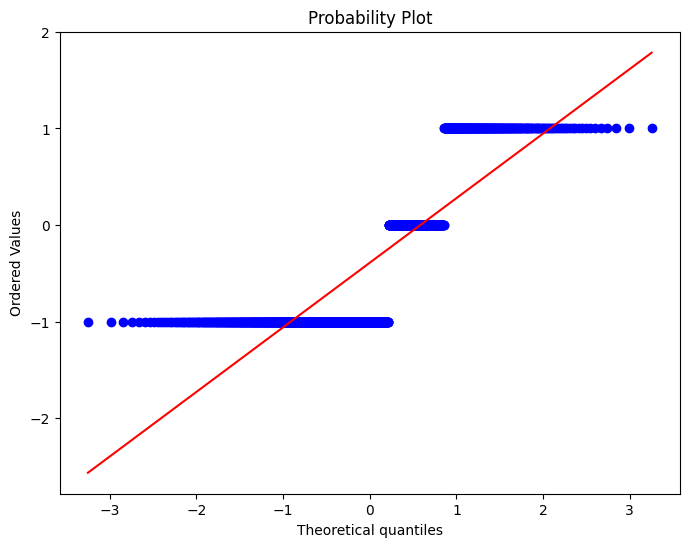

In [9]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Assuming you have your sentiment scores in a Pandas DataFrame
sentiment_scores = df['LABEL']

# Shapiro-Wilk Test
stat, p_value = shapiro(sentiment_scores)
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")

# Interpret the p-value
if p_value > 0.05:
    print("Data is normally distributed (Fail to reject H0).")
else:
    print("Data is not normally distributed (Reject H0).")

# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(sentiment_scores, dist="norm", plot=plt)
plt.show()
# Histogramsns.histplot(sentiment_scores, kde=True)
plt.show()

**Step 3: Apply homogeneity analysis for the database used to collect data (eg. Databases are twitter, reddit,
youtube etc.)
Goal: Determine if there are significant differences in sentiment scores between different databases.**

In [8]:
from scipy.stats import levene

# Group sentiment scores by 'SOURCE'
grouped_sentiments = [group['LABEL'] for name, group in df.groupby('SOURCE')]

# Levene's Test for equal variances
stat, p_value = levene(*grouped_sentiments)
print(f"Levene's Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")

# Interpret the p-value
if p_value > 0.05:
    print("Variances are equal (Fail to reject H0).")
else:
    print("Variances are not equal (Reject H0).")


Levene's Test Statistic: 72.9970, P-Value: 0.0000
Variances are not equal (Reject H0).


***Interpretation:***

**If the p-value of Levene's Test is greater than 0.05, variances are considered equal, and parametric
tests can be used.**

**If the p-value is less than or equal to 0.05, variances are not equal, and non-parametric tests may
be more suitable.**

**Step 4: Based on the output from step 2 and step 3, choose to perform either ANOVA or Kruskal-Wallis
test**

In [13]:
from scipy.stats import levene, shapiro, f_oneway, kruskal

# If data is normally distributed and variances are equal, perform ANOVA
if p_value > 0.05 and shapiro(sentiment_scores)[1] > 0.05:
    f_statistic, anova_p_value = f_oneway(*grouped_sentiments)
    
    print(f"ANOVA F-Statistic: {f_statistic:.4f}, P-Value: {anova_p_value:.4f}")
    
    if anova_p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference between the groups.")
    else:
        print("Fail to reject the null hypothesis: No significant difference between the groups.")
else:
    # If data is not normally distributed or variances are not equal, perform Kruskal-Wallis H Test
    h_statistic, kruskal_p_value = kruskal(*grouped_sentiments)
    print(f"Kruskal-Wallis H Statistic: {h_statistic:.4f}, P-Value:{kruskal_p_value:.4f}")
    
if kruskal_p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")

Kruskal-Wallis H Statistic: 111.6024, P-Value:0.0000
Reject the null hypothesis: There is a significant difference between the groups.


**Explanation:
1. Normality Check:
a) Shapiro-Wilk Test: Tests if the sentiment scores are normally distributed.
b) Q-Q Plot and Histogram: Visual methods to inspect the distribution.
2. Homogeneity of Variance Check:
a) Levene's Test: Tests if the variances of sentiment scores across different databases are equal.
3. Test Selection:
a) ANOVA: Used if data is normally distributed and variances are equal.
b) Kruskal-Wallis H Test: Used if data is not normally distributed or variances are not equal.**

**Step 5: Check correlation between sentiments and comment length**

Pearson Correlation between Sentiment and Comment Length: 0.1516, P-Value: 0.0000
Spearman Correlation between Sentiment and Comment Length: 0.1768, P-Value: 0.0000


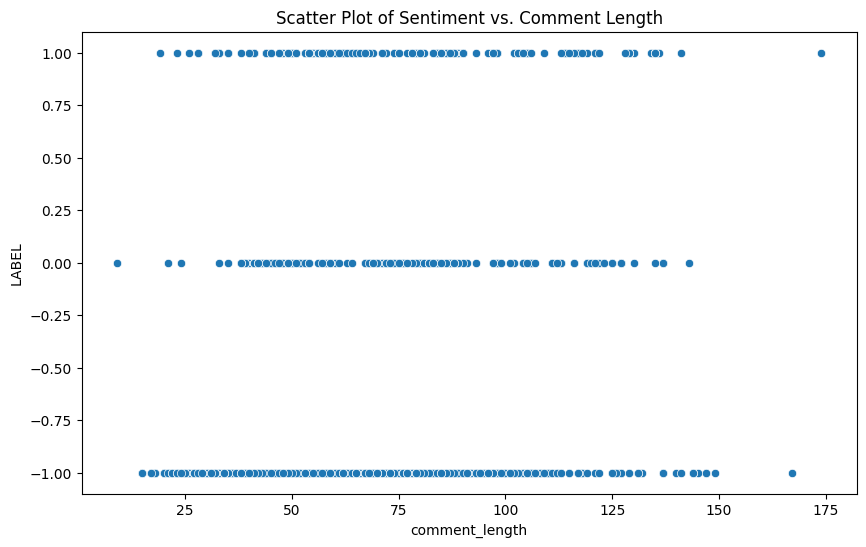

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Create additional variables if needed
# For example, calculate the comment length if it's not already in your data
df['comment_length'] = df['COMMENT'].apply(len)

# If you have a timestamp or timing information, ensure it's in a datetime format
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# Checking correlations between sentiment and comment length
pearson_corr, pearson_p_value = pearsonr(df['LABEL'], df['comment_length'])
spearman_corr, spearman_p_value = spearmanr(df['LABEL'], df['comment_length'])
print(f"Pearson Correlation between Sentiment and Comment Length: {pearson_corr:.4f}, P-Value: {pearson_p_value:.4f}")
print(f"Spearman Correlation between Sentiment and Comment Length: {spearman_corr:.4f}, P-Value: {spearman_p_value:.4f}")

# Visualizing the correlation with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comment_length', y='LABEL', data=df)
plt.title('Scatter Plot of Sentiment vs. Comment Length')
plt.show()

# If you have timing information, you could create a variable like time of day or dayof week
# df['hour'] = df['timestamp'].dt.hour
# df['day_of_week'] = df['timestamp'].dt.dayofweek
# Checking correlations between sentiment and timing (if applicable)
# pearson_corr_time, pearson_p_value_time = pearsonr(df['sentiment'], df['hour'])
# spearman_corr_time, spearman_p_value_time = spearmanr(df['sentiment'], df['hour'])
# print(f"Pearson Correlation between Sentiment and Hour of Day: {pearson_corr_time:.4f}, P-Value: {pearson_p_value_time:.4f}")
# print(f"Spearman Correlation between Sentiment and Hour of Day: {spearman_corr_time:.4f}, P-Value: {spearman_p_value_time:.4f}")
# Visualizing correlation with timing (if applicable)
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='hour', y='sentiment', data=df)
# plt.title('Scatter Plot of Sentiment vs. Hour of Day')
# plt.show()

Explanation:
1. Correlation Tests:
Pearson Correlation: Assesses the linear relationship between two continuous variables
(use when data is normally distributed).o
Spearman Correlation: Assesses the monotonic relationship (use when data is not
normally distributed or when dealing with ordinal data).
2. Comment Length:
The code calculates the length of each comment and then checks the correlation between
comment length and sentiment score.
3. Timing Information (if applicable):
If you have timestamp data, you can extract features like the hour of the day or the day of
the week and analyze their correlation with sentiment.
4. Visualization:
Scatter plots help visualize the relationship between sentiment and the other variables,
giving you an intuitive understanding of the dat

In [19]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Create additional features (e.g., comment length)
df['comment_length'] = df['COMMENT'].apply(len)

# Calculate Pearson correlation coefficient and p-value between 'comment_length' and 'LABEL'
pearson_corr, pearson_p = stats.pearsonr(df['comment_length'], df['LABEL'])

# Calculate Spearman's rank correlation coefficient and p-value between 'comment_length' and 'LABEL'
spearman_corr, spearman_p = stats.spearmanr(df['comment_length'], df['LABEL'])

# Print results
print(f'Pearson Correlation Coefficient: {pearson_corr:.4f}')
print(f'Pearson p-value: {pearson_p:.4f}')
print(f'Spearman Correlation Coefficient: {spearman_corr:.4f}')
print(f'Spearman p-value: {spearman_p:.4f}')


Pearson Correlation Coefficient: 0.1516
Pearson p-value: 0.0000
Spearman Correlation Coefficient: 0.1768
Spearman p-value: 0.0000


Interpretation

•Pearson Correlation Coefficient: Measures the linear relationship between two
continuous variables. Ranges from -1 to 1. Positive values indicate a positive
linear relationship, while negative values indicate a negative linear
relationship. Values close to 0 indicate no linear correlation.

•Spearman’s Rank Correlation Coefficient: Measures the monotonic relationship
between two variables, which is useful for non-parametric data. Ranges from -1
to 1, similar to Pearson.


•P-values: Indicate the significance of the correlation. A p-value less than
0.05 typically indicates a statistically significant correlation.
Example Interpretation:


•Pearson Correlation Coefficient of 0.65 with a p-value of 0.01: Suggests a
strong positive linear relationship between comment length and sentiment, and
this result is statistically significant.


•Spearman Correlation Coefficient of 0.60 with a p-value of 0.02: Indicates a
strong monotonic relationship between the two variables, also statistically
significant.

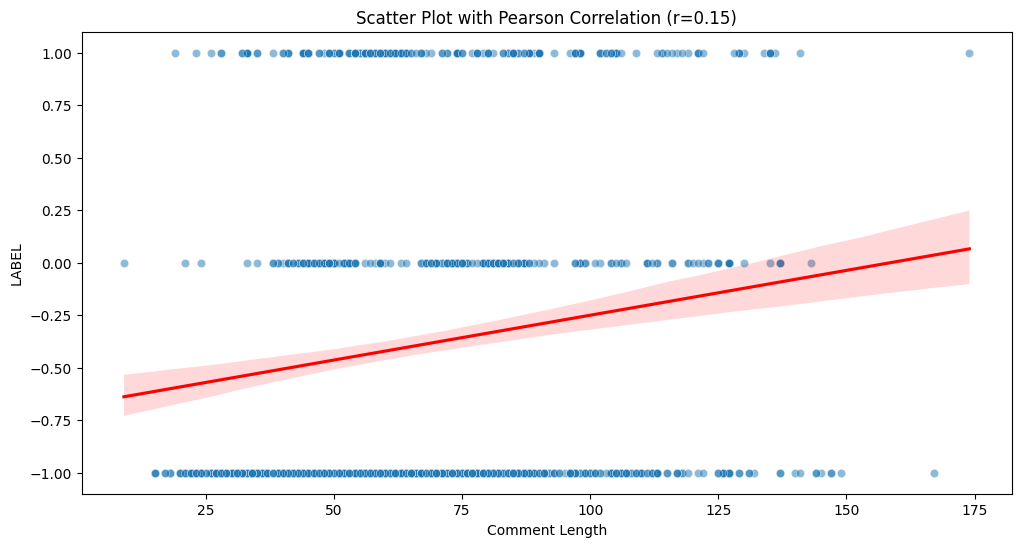

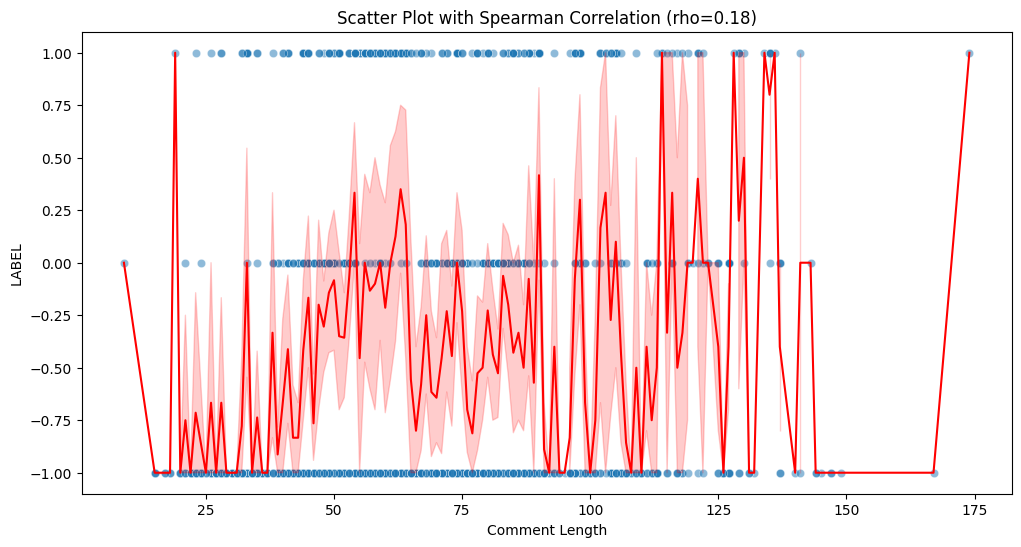

In [20]:
# Visualization Code

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with Pearson correlation line
plt.figure(figsize=(12, 6))
sns.scatterplot(x='comment_length', y='LABEL', data=df, alpha=0.5)
sns.regplot(x='comment_length', y='LABEL', data=df, scatter=False, color='r')
plt.title(f'Scatter Plot with Pearson Correlation (r={pearson_corr:.2f})')
plt.xlabel('Comment Length')
plt.ylabel('LABEL')
plt.show()


# Scatter plot with Spearman correlation line (non-parametric)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='comment_length', y='LABEL', data=df, alpha=0.5)
sns.lineplot(x='comment_length', y='LABEL',
data=df.sort_values(by='comment_length'), color='r')
plt.title(f'Scatter Plot with Spearman Correlation (rho={spearman_corr:.2f})')
plt.xlabel('Comment Length')
plt.ylabel('LABEL')
plt.show()